In [97]:
import os
import pathlib
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import random_rotation,random_zoom,random_shear
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator

In [98]:
font_paths=list(map(str,list(pathlib.Path('fonts/').glob('*.ttf'))))
font_paths

['fonts/Helvetica-Bold.ttf',
 'fonts/helvetica-light-587ebe5a59211.ttf',
 'fonts/Helvetica.ttf',
 'fonts/Helvetica-BoldOblique.ttf',
 'fonts/times new roman bold.ttf',
 'fonts/times new roman.ttf',
 'fonts/times new roman bold italic.ttf',
 'fonts/Calibri.ttf',
 'fonts/times new roman italic.ttf',
 'fonts/calibrib.ttf',
 'fonts/calibril.ttf',
 'fonts/Helvetica-Oblique.ttf']

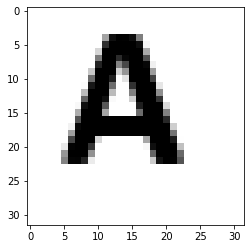

In [99]:
base_image=np.ones((32,32))*255
cv2.imwrite('base_image.png',base_image)
base_image=Image.open('base_image.png')
base_mat=ImageDraw.Draw(base_image)
myFont = ImageFont.truetype('fonts/calibrib.ttf', 30)
base_mat.text((5,0),"A",fill=0,font=myFont)
plt.imshow(base_image,cmap='gray')

In [100]:
nums=[str(i)for i in range(10)]
small=[chr(ord('a')+i)for i in range(26)]
caps=[chr(ord('A')+i)for i in range(26)]
combined=nums+small+caps

In [134]:
import shutil
shutil.rmtree('dataset')

In [135]:
os.mkdir('dataset')
for char in combined:
    count=0
    os.mkdir(f'dataset/{char}')
    for font_path in font_paths:
        base_image=Image.open('base_image.png')
        base_mat=ImageDraw.Draw(base_image)
        

        fontsize = 1  # starting font size

        # portion of image width you want text width to be
        img_fraction = 0.50
        font_style = ImageFont.truetype(font_path, fontsize)
        while font_style.getsize(char)[0] < img_fraction*base_image.size[0]:
            # iterate until the text size is just larger than the criteria
            fontsize += 1
            font_style = ImageFont.truetype(font_path, fontsize)

        # optionally de-increment to be sure it is less than criteria
        fontsize -= 1
        font_style = ImageFont.truetype(font_path, fontsize)

        print('final font size',fontsize)
        base_mat.text((6, 2), char, font=font_style,fill='black')

        base_image.save(f'dataset/{char}/{count}.png')
        count+=1
        

final font size 27
final font size 27
final font size 27
final font size 23
final font size 30
final font size 30
final font size 30
final font size 30
final font size 30
final font size 30
final font size 30
final font size 24
final font size 27
final font size 27
final font size 27
final font size 27
final font size 30
final font size 30
final font size 30
final font size 30
final font size 30
final font size 30
final font size 30
final font size 27
final font size 27
final font size 27
final font size 27
final font size 23
final font size 30
final font size 30
final font size 28
final font size 30
final font size 30
final font size 30
final font size 30
final font size 23
final font size 27
final font size 27
final font size 27
final font size 24
final font size 30
final font size 30
final font size 28
final font size 30
final font size 30
final font size 30
final font size 30
final font size 24
final font size 27
final font size 27
final font size 27
final font size 25
final font s

In [136]:
image_paths=list(map(str,list(pathlib.Path('dataset').glob('*'))))
for image_path in image_paths:
    char=image_path.split('/')[-1]
    datagen=ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    )
    generator=datagen.flow_from_directory('dataset',
    classes=[char],
    save_format='png',
    save_to_dir=image_path,
    batch_size=64,
    target_size=(32, 32),)
    generator.next()
    generator.next()
    generator.next()
    generator.next()

    

Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
